<a href="https://colab.research.google.com/github/Kai0421/TensorFlowLearning/blob/main/Num_Reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Tutorial
[Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k)




In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28 x 28 images of hand-written digits 0-9 dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1) #Normalize data by scaling it
x_test = tf.keras.utils.normalize(x_test, axis=1) #Normalize data by scaling it

#What is an sequential Model https://www.tensorflow.org/guide/keras/sequential_model
## A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

# this defines the model as a sequential model
model = tf.keras.models.Sequential() 

# flatten the model, atm we dont want to have multi layer model
model.add(tf.keras.layers.Flatten())

# 128 means using 128 neurons, and give an activation function in this case is relu(rectify linear)
model.add(tf.keras.layers.Dense(784, activation=tf.nn.relu6))

# 2nd layer
model.add(tf.keras.layers.Dense(784, activation=tf.nn.relu6))

# model.add(tf.keras.layers.Dense(784, activation=tf.nn.relu6)) # 3rd layer


# output layer, classification on how may possible output - 0, 9
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

# loss = the degree of err, neural network doesnt try to optimize accuracy but instead minimize loss, the way you calculate loss will make a huge impact on the accuracy of the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #adam optimizer
modelFitHistory = model.fit(x_train, y_train, epochs=3) 


11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1918 - accuracy: 0.9409
Epoch 2/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0792 - accuracy: 0.9757
Epoch 3/3
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0558 - accuracy: 0.9819


##Evaluate and Save the model 
- Calculating the degree of accuracy (Delta) using the final fit output accuracy - the evalutated accurate

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Delta of accuracy : ', round(modelFitHistory.history['accuracy'][len(modelFitHistory.history['accuracy'])-1] - val_acc, 5))

model.save('num_reader.model')

313/313 [==============================] - 1s 3ms/step - loss: 0.1150 - accuracy: 0.9678
Delta of accuracy :  0.01443
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: num_reader.model/assets


##Saving, Loading and Use model for Prediction

In [ ]:
##loading the model with the model name 
num_reader_model = tf.keras.models.load_model('num_reader.model')

##Prediction
predictions = num_reader_model.predict([x_test]) # predict function always take a list
# print(predictions)

import numpy as np

# Print the first predictions in text
print(np.argmax(predictions[0])) 

import matplotlib.pyplot as plt

# Using matplotlib to show the image of the first test
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

OSError: ignored

#Additional stuff

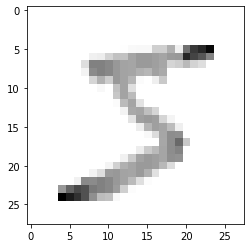

In [ ]:
#Plot to show first train image as example
import matplotlib.pyplot as plt

#plt.imshow(x_train[0]) # plot the number
#print(x_train[0], x_train[1]) # this shows a multi-dimensional array/ matrices representing the number 
plt.imshow(x_train[0], cmap=plt.cm.binary) # plot the number in black and white / binary value
plt.show()